In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("../Web Scraping/predicting_house_price.csv")
df = df.drop(["Unnamed: 0"], axis =1)

# Review the DataFrame
df.head()

,lat,lon,city,style,building_type,cooling_type,heating_type,price,number_of_beds,number_of_baths,extra_space,fire_place
0,43.333410,-79.882930,Waterdown,Townhouse,Row / Townhouse,Central air conditioning,Forced air,749900.0,2,3,0,0
1,43.856371,-79.337682,Markham,Detached,House,Central air conditioning,Forced air,2998000.0,5,8,1,1
2,43.670890,-79.316931,Toronto,Detached,House,Central air conditioning,Forced air,2599900.0,3,4,0,1
3,43.589623,-79.644388,Mississauga,Semi-Detached,House,Central air conditioning,Forced air,2499850.0,4,4,1,0
4,43.447436,-79.666672,Oakville,Detached,House,Central air conditioning,Forced air,1999000.0,5,4,0,1


In [3]:
df['heating_type'].value_counts()

Forced air                               564
Baseboard heaters                         10
Hot water radiator heat                    9
Radiant heat                               8
Boiler                                     3
Heat Pump                                  3
Baseboard heaters, Forced air              2
Forced air, Heat Pump                      2
Baseboard heaters, Heat Pump               2
Hot water radiator heat, Radiant heat      2
Baseboard heaters, Other                   1
Baseboard heaters, Boiler                  1
Radiant heat, Boiler                       1
Forced air, Wood Stove                     1
Name: heating_type, dtype: int64

In [4]:
df = df.loc[(df['heating_type'] == 'Forced air') | (df['heating_type'] == 'Baseboard heaters')]

In [5]:
df['heating_type'] = df['heating_type'].map({'Forced air': 0, 'Baseboard heaters': 1})

In [6]:
df['cooling_type'].value_counts()

Central air conditioning                           552
Wall unit                                            6
None                                                 6
Central air conditioning, Fully air conditioned      4
Window air conditioner                               4
Air exchanger, Central air conditioning              2
Name: cooling_type, dtype: int64

In [7]:
df = df.loc[(df['cooling_type'] == 'Central air conditioning') | (df['cooling_type'] == 'Wall unit') | (df['cooling_type'] == 'None')] 

In [8]:
df['cooling_type'] = df['cooling_type'].map({'Central air conditioning': 0, 'Wall unit': 1, 'None': 2})

In [9]:
df['building_type'].unique()

array(['Row / Townhouse', 'House'], dtype=object)

In [10]:
df['building_type'] = df['building_type'].map({'Row / Townhouse': 1, 'House': 2, 'Mobile Home': 3})

In [11]:
df['style'].unique()

array(['Townhouse', 'Detached', 'Semi-Detached'], dtype=object)

In [12]:
# Townhouse=1, Detached=2, Semi=Detached=3
df['style'] = df['style'].map({'Townhouse': 1, 'Detached': 2, 'Semi-Detached': 3})


In [13]:
west_df = df.loc[(df['city'] == 'Toronto') | (df['city'] == 'Ottawa')]

west_df['city'] = west_df['city'].map({'Toronto': 1, 'Ottawa': 2})


west_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_24552\385706301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_df['city'] = west_df['city'].map({'Toronto': 1, 'Ottawa': 2})


,lat,lon,city,style,building_type,cooling_type,heating_type,price,number_of_beds,number_of_baths,extra_space,fire_place
2,43.670890,-79.316931,1,2,2,0,0,2599900.0,3,4,0,1
12,45.420878,-75.690111,2,2,2,0,0,866000.0,3,2,0,0
13,43.641342,-79.399759,1,1,1,1,1,838000.0,2,2,1,1
15,45.420878,-75.690111,2,1,1,0,0,645900.0,3,2,0,1
29,43.680090,-79.354896,1,2,2,0,0,2195000.0,4,5,1,1


In [14]:
# Look at correlation matrix
print(west_df.corr())

                      lat       lon      city     style  building_type  \
lat              1.000000  0.998785  0.998961 -0.050920      -0.075220   
lon              0.998785  1.000000  0.999049 -0.050394      -0.077625   
city             0.998961  0.999049  1.000000 -0.047542      -0.075465   
style           -0.050920 -0.050394 -0.047542  1.000000       0.817391   
building_type   -0.075220 -0.077625 -0.075465  0.817391       1.000000   
cooling_type     0.030590  0.037178  0.036236  0.014869      -0.071133   
heating_type    -0.124757 -0.116002 -0.119358 -0.165761      -0.175000   
price           -0.403839 -0.406052 -0.403563  0.192567       0.353138   
number_of_beds  -0.000292 -0.007220 -0.002140  0.184868       0.365163   
number_of_baths  0.008602  0.001958  0.000229  0.131046       0.248260   
extra_space     -0.345689 -0.351843 -0.349966 -0.079225      -0.017150   
fire_place       0.109669  0.107175  0.104984  0.113321       0.229133   

                 cooling_type  heatin

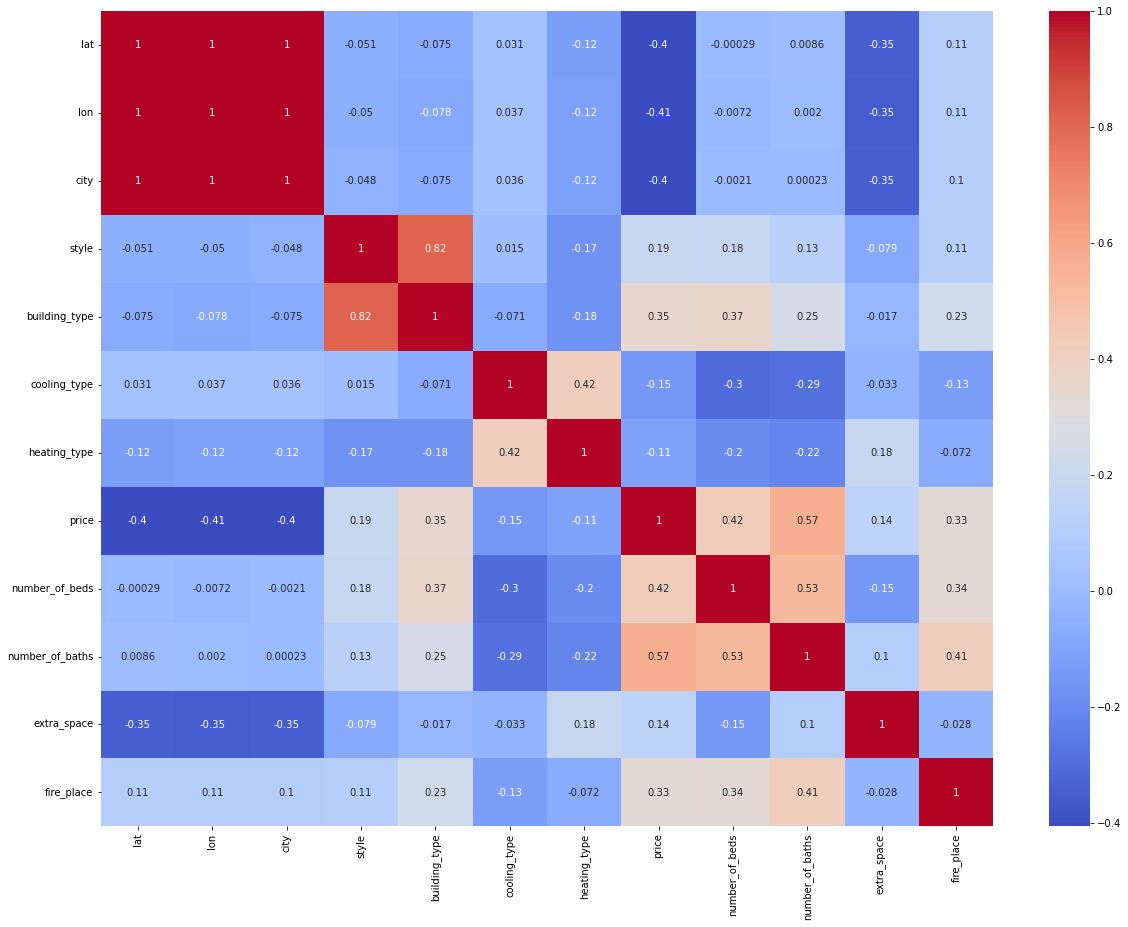

In [15]:
# Plot matrix
plt.figure(figsize=(20, 15))
correlations = west_df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [16]:
# Turn categorical columns to 1's/0's
# df_encoded = pd.get_dummies(west_df, columns=['city', 'style', 'building_type', 'cooling_type', 'heating_type'])
new_df = west_df.drop(columns=["lat", "lon", "price"])

new_df.head() 

,city,style,building_type,cooling_type,heating_type,number_of_beds,number_of_baths,extra_space,fire_place
2,1,2,2,0,0,3,4,0,1
12,2,2,2,0,0,3,2,0,0
13,1,1,1,1,1,2,2,1,1
15,2,1,1,0,0,3,2,0,1
29,1,2,2,0,0,4,5,1,1


# Preprocessing Data

In [17]:
# Separate the data into labels and features
# X = new_df.copy()
X = StandardScaler().fit_transform(new_df)

X_df = pd.DataFrame(X, columns=new_df.columns)

# Separate the y variable, the labels
y = west_df["price"]

X_df.head()

,city,style,building_type,cooling_type,heating_type,number_of_beds,number_of_baths,extra_space,fire_place
0,-0.675191,0.076859,0.565685,-0.193456,-0.176777,-0.182430,1.208853,-0.970143,0.931625
1,1.481063,0.076859,0.565685,-0.193456,-0.176777,-0.182430,-0.872477,-0.970143,-1.073394
2,-0.675191,-1.444957,-1.767767,3.636969,5.656854,-1.571707,-0.872477,1.030776,0.931625
3,1.481063,-1.444957,-1.767767,-0.193456,-0.176777,-0.182430,-0.872477,-0.970143,0.931625
4,-0.675191,0.076859,0.565685,-0.193456,-0.176777,1.206847,2.249518,1.030776,0.931625


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Splitting into testing/training data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)


# Create decision tree regression instance
model = DecisionTreeRegressor(max_depth=5)

# Fit model
model = model.fit(X_train, y_train)

# Making predictions using scaled data
predictions = model.predict(X_test)

# Print prdicted price for tested features
y_pred = pd.Series(predictions.tolist())
y_pred

0     1.030327e+06
1     7.712248e+05
2     8.246333e+05
3     1.074950e+06
4     7.712248e+05
5     1.859299e+06
6     6.649750e+05
7     6.649750e+05
8     1.859299e+06
9     2.279300e+06
10    1.859299e+06
11    2.988000e+06
12    2.988000e+06
13    1.030327e+06
14    1.859299e+06
15    1.545180e+06
16    2.159000e+06
17    1.545180e+06
18    7.712248e+05
19    6.550000e+05
dtype: float64

# Sumary of Data

In [19]:
# Import relevant metrics from scikit-learn: score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute the metrics for the linear regression model
score = model.score(X_train, y_train, sample_weight=None)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.6994576943952595.
The r2 is 0.3852802928188457.
The mean squared error is 371546765101.5504.
The root mean squared error is 609546.3600921184.
The standard deviation is 646709.6082836475.


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

scores = cross_val_score(model, X_train, y_train, cv=5)
print("mean cross validation score: {}".format(np.mean(scores)))

mean cross validation score: 0.22306832803524265


In [21]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
scoring = make_scorer(r2_score)

g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_
# print(result)
r2_score(y_test, g_cv.best_estimator_.predict(X_test))

0.5629405533636149